## Observations and Insights 

In [433]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

In [434]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [435]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [436]:
#combine files and display the data table for preview
combine_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combine_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [437]:
# Checking the number of mice.
total_mice = len(combine_data_df['Mouse ID'])
#.count()
total_mice



1893

In [438]:
#Check unique count
unique_mice_count = len(combine_data_df["Mouse ID"].unique())
unique_mice_count


249

In [439]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combine_data_df.duplicated()
duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [440]:
Mouse_duplicates = combine_data_df[duplicates]

Mouse_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [441]:
#drop duplicates 
#Clean_Mouse_df = combine_data_df.drop_duplicates(subset=['Mouse ID'])
#Clean_Mouse_df

In [442]:
clean_data = combine_data_df.drop(index=909)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [443]:
#clean_data = Clean_Mouse_df['Mouse ID'].count()
#clean_data

In [444]:
# Checking the number of mice in the clean DataFrame.
#total_clean_mice = Clean_Mouse_df['Mouse ID'].count()
#total_clean_mice

## Summary Statistics

In [445]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [497]:
#Group clean data by drug regimen
Drug_Regimen_group = clean_data.groupby("Drug Regimen")


In [498]:
#calculate the mean of the tumor volume.
Drug_Regimen_mean = Drug_Regimen_group["Tumor Volume (mm3)"].mean()
Drug_Regimen_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.368318
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [499]:
#calculate the median of the tumor volume.
Drug_Regimen_median = Drug_Regimen_group["Tumor Volume (mm3)"].median()
Drug_Regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [500]:
#calculate the variance of the tumor volume.
Drug_Regimen_variance = Drug_Regimen_group["Tumor Volume (mm3)"].var()
Drug_Regimen_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.278090
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [501]:
#calculate the standard deviation of the tumor volume.
Drug_Regimen_standard_deviation = Drug_Regimen_group["Tumor Volume (mm3)"].std()
Drug_Regimen_standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.502160
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [502]:
#calculate the SEM of the tumor volume.
Drug_Regimen_sem = Drug_Regimen_group["Tumor Volume (mm3)"].sem()
Drug_Regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [503]:
# Assemble the resulting series into a single summary dataframe.
Summary_df = pd.DataFrame({"Mean Tumor Volume": Drug_Regimen_mean,"Median Tumor Volume": Drug_Regimen_median,"Tumor Volume Variance": Drug_Regimen_variance, "Tumor Volume Standard deviation": Drug_Regimen_standard_deviation, "Tumor Volume SEM" : Drug_Regimen_sem})
Summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [504]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.aggregate(["mean", "median", "var", "std", "sem"])
#agg
#Clean_Mouse_df.aggregate({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
mean,12.810254,25.662262,19.582452,50.451260,1.022199
median,13.000000,27.000000,20.000000,48.954697,1.000000
var,51.682116,15.387195,198.133335,79.142206,1.295118
std,7.189027,3.922652,14.075984,8.896191,1.138032
sem,0.165276,0.090182,0.323607,0.204524,0.026163


## Bar and Pie Charts

In [505]:
total_mouse = clean_data['Drug Regimen'].value_counts() 
total_mouse

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     160
Name: Drug Regimen, dtype: int64

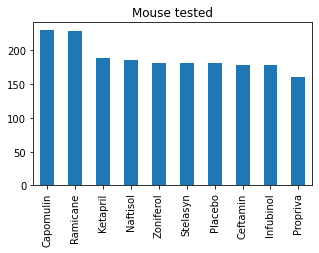

<Figure size 432x288 with 0 Axes>

In [506]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_mouse.plot(kind="bar", figsize=(5,3))
plt.title("Mouse tested")
plt.show()
plt.tight_layout()

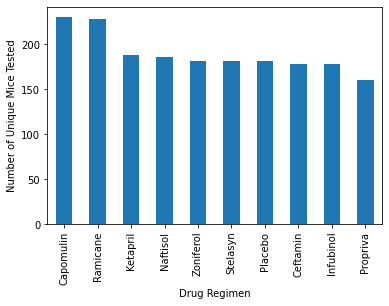

<Figure size 432x288 with 0 Axes>

In [507]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_mice_chart = total_mouse.plot(kind='bar')

# Set the xlabel and ylabel using class methods
unique_mice_chart.set_xlabel("Drug Regimen")
unique_mice_chart.set_ylabel("Number of Unique Mice Tested")


plt.show()
plt.tight_layout()

In [508]:
total_sex = clean_data['Sex'].value_counts() 
total_mouse

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     160
Name: Drug Regimen, dtype: int64

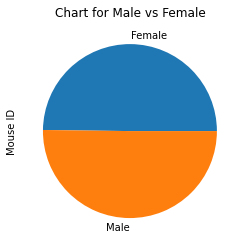

In [509]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = Clean_Mouse_df.groupby('Sex').count()['Mouse ID']
gender
gender_pie_plot = gender.plot.pie(y='Sex',title='Chart for Male vs Female') 


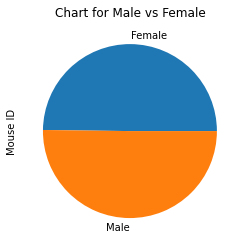

In [510]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Creating plot 
plt.pie(gender,labels=gender.index);
plt.title("Chart for Male vs Female")
plt.ylabel('Mouse ID')
plt.show()


## Quartiles, Outliers and Boxplots

In [511]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [512]:
#create a dateframe for each Drug Regimen
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

In [513]:
#calculate the maximum value of Timepoint for each Drug Regimen
Capomulin_max = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_max_df = pd.DataFrame(Capomulin_max)

In [514]:
#merge Capoomulin_max to the original dataframe 
Capomulin_max_merge_df = pd.merge(Capomulin_max_df, clean_data, on=("Mouse ID","Timepoint"), how="left")
Capomulin_max_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [515]:
#calculate the maximum value of Timepoint for each Drug Regimen
Ramicane_max = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_max_df = pd.DataFrame(Ramicane_max)

In [516]:
#merge Ramicane_max to the original dataframe 
Ramicane_max_merge_df = pd.merge(Ramicane_max_df, clean_data, on=("Mouse ID","Timepoint"), how="left")
Ramicane_max_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [517]:
#calculate the maximum value of Timepoint for each Drug Regimen
Infubinol_max = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_max_df = pd.DataFrame(Infubinol_max)

In [518]:
#merge Ramicane_max to the original dataframe 
Infubinol_max_merge_df = pd.merge(Infubinol_max_df, clean_data, on=("Mouse ID", "Timepoint"), how="left")
Infubinol_max_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [519]:
#calculate the maximum value of Timepoint for each Drug Regimen
Ceftamin_max = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_max_df = pd.DataFrame(Ceftamin_max)

In [520]:
#merge Ramicane_max to the original dataframe 
Ceftamin_max_merge_df = pd.merge(Ceftamin_max_df, clean_data, on=("Mouse ID","Timepoint"), how="left")
Ceftamin_max_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [521]:
# Calculate the interquartile range for outliers.
Capomulin_tumors = Capomulin_max_merge_df["Tumor Volume (mm3)"]
Capomulin_quartiles = Capomulin_tumors.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)

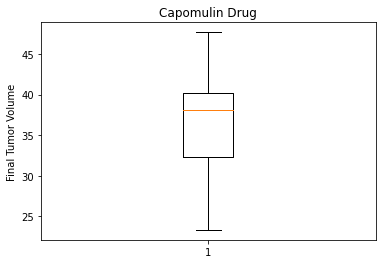

In [522]:
#Plot box plot of the final tumor volume for Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Capomulin_tumors)
plt.show()

In [523]:
# Calculate the interquartile range for outliers. 
Ramicane_tumors = Ramicane_max_merge_df["Tumor Volume (mm3)"]
Ramicane_quartiles = Ramicane_tumors.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)

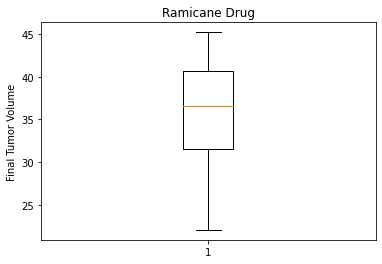

In [524]:
#Plot box plot of the final tumor volume for Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Ramicane_tumors)
plt.show()

In [525]:
# Calculate the interquartile range for outliers. 
Infubinol_tumors =  Infubinol_max_merge_df["Tumor Volume (mm3)"]
Infubinol_quartiles =  Infubinol_tumors.quantile([.25,.5,.75])
Infubinol_lowerq =  Infubinol_quartiles[0.25]
Infubinol_upperq =  Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

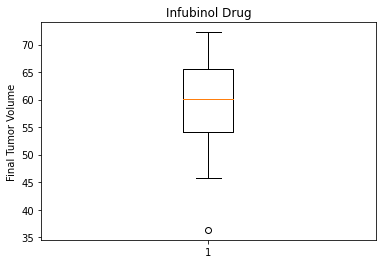

In [526]:
#Plot box plot of the final tumor volume for Infubinol
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Infubinol_tumors)
plt.show()

In [527]:
# Calculate the interquartile range for outliers.
Ceftamin_tumors = Ceftamin_max_merge_df["Tumor Volume (mm3)"]
Ceftamin_quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ramicane_lowerq

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

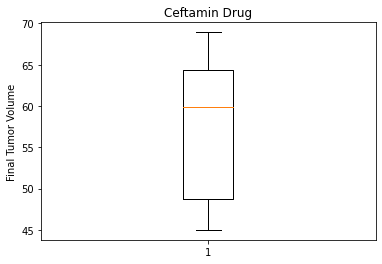

In [528]:
#Plot box plot of the final tumor volume for Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Ceftamin_tumors)
plt.show()

## Line and Scatter Plots

In [529]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = Capomulin_df [["Timepoint","Tumor Volume (mm3)"]]
line_plot_df.head()


,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876


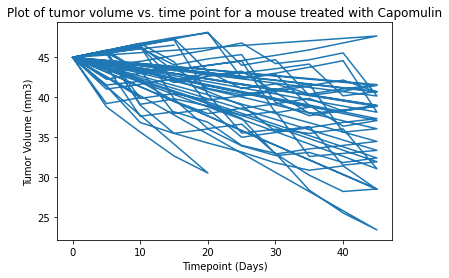

In [530]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = Capomulin_df [["Timepoint","Tumor Volume (mm3)"]]
x_axis = line_plot_df["Timepoint"]
y = line_plot_df["Tumor Volume (mm3)"]

plt.title('Plot of tumor volume vs. time point for a mouse treated with Capomulin')
#plt.plot(x_axis,y,linewidth=3, markersize=15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y)
plt.show()

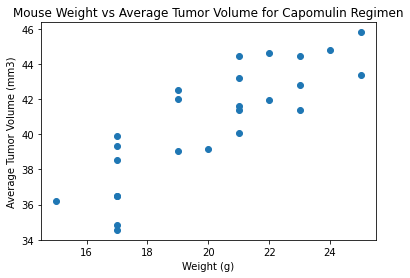

In [488]:
Capomulin_df_average = Capomulin_df.groupby(['Mouse ID']).mean()
x_values = Capomulin_df_average['Weight (g)']
y_values = Capomulin_df_average['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [489]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


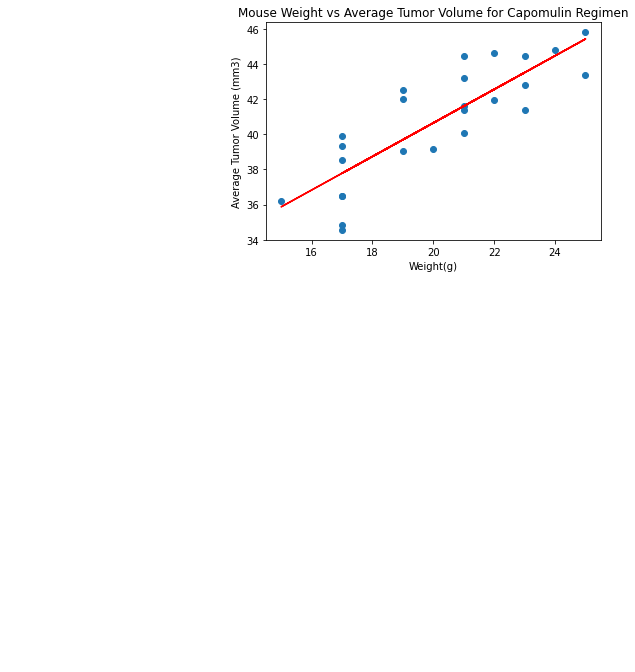

In [490]:
x_values = Capomulin_df_average['Weight (g)']
y_values = Capomulin_df_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
plt.show()